# **TALLER APRENDIZAJE AUTOMÁTICO 1 : REGRESIÓN LINEAL**



#1. Autores
Universidad de Antioquia
Desarrollado por: 
**Nombre Completo:Juan Pablo Montoya Vallejo**

**Cédula:1152211395**

**Correo Institucional:juan.montoya116@udea.edu.co**

**Nombre Completo:Daniel Vanegas Gómez**

**Cédula:1036399967**

**Correo Institucional:daniel.vanegasg@udea.edu.co**

# 2. Descripcion

PROBLEMA DE NEGOCIO

Tendremos un estudio del costo que genera conseguir nuevos clientes en la cadena de supermercados  FOODMARKET la cual dispuso una base de datos real para su análisis.
Food Mart (CFM) es una cadena de tiendas de conveniencia en los Estados Unidos. La sede de la empresa privada se encuentra en Mentor, Ohio, y actualmente hay aproximadamente 325 tiendas ubicadas en los EE. UU. Convenient Food Mart opera con el sistema de franquicias.


APROXIMACIÓN DESDE LA ANALÍTICA DE DATOS
se tendra como base de datos, la cual ya ha sido dispuesta en la página de kaggle por el usuario RAM JAS hace agosto de este año y fue dispuesta para su uso en analitica, esta base de datos cuenta con  un archivo .csv de 60.000 filas y 40 columnas que contiene tanto datos categoricos como numericos de las diferentes tiendas y datos de los usuarios.

link: 

https://www.kaggle.com/code/mayurspawar/customer-acquisition-prediction


El objetivo principal de este ejercicio es encontrar la mayoría de las funciones que afectan la predicción del costo de adquirir un cliente a través de los medios


#3. Experimentos

## 3.1 Librerias y configuraciones previas


In [128]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", None, "display.max_columns", None)
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import math

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler

#Creacion de los modelos
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import sklearn.metrics as metrics

# Conexion a google drive para carga de dataset
# ==============================================================================

# from google.colab import drive
# drive.mount('/content/drive')

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import math


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error



from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
#evaluacion de variables
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

## 3.2 Funciones

In [129]:
## Aqui se insertan las funciones propias
## =============================================================================

def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):
    
    plt.rcParams['figure.figsize'] = figsize
    
    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c': 
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=d[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

# Función para contruir un modelo de regresión lineal por medio de statsmodels.api

def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

## 3.3 Carga del dataset

In [130]:
df=pd.read_csv('data/media_prediction_and_its_cost.csv')
   #df=pd.read_csv('/content/drive/My Drive/Estudio/UDEA/Especializacion/Semestre2022_2/Aprendizaje_automatico_1/Taller_aprendizaje_automatico/data/media_prediction_and_its_cost.csv')


In [131]:
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


## 3.4 Limpieza de datos y preparación

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [133]:
df.shape

(60428, 40)

In [134]:
df.isnull().sum()

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

In [135]:
df = df.drop_duplicates()

In [136]:
df.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,0.829351,2.200271,2.115258,13.806433,11.796289,0.558665,0.350434,18.860694,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,3.463047,1.453009,0.827677,1.490165,1.109644,1.303424,1.109644,0.932829,4.622693,4.682986,0.496551,0.477110,10.258555,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,0.000000,0.000000,1.000000,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,0.000000,1.000000,1.410000,9.700000,7.710000,0.000000,0.000000,10.000000,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.600000,11.600000,1.000000,0.000000,19.000000,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,1.000000,3.000000,2.790000,17.700000,16.000000,1.000000,1.000000,28.000000,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,20.800000,1.000000,1.000000,36.000000,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [137]:
print(df.cost.describe(percentiles = [0.25,0.50,0.75,1]))

count    60428.000000
mean        99.262366
std         30.011257
min         50.790000
25%         69.650000
50%         98.520000
75%        126.620000
100%       149.750000
max        149.750000
Name: cost, dtype: float64


## 3.5 Visualización de datos

<AxesSubplot:>

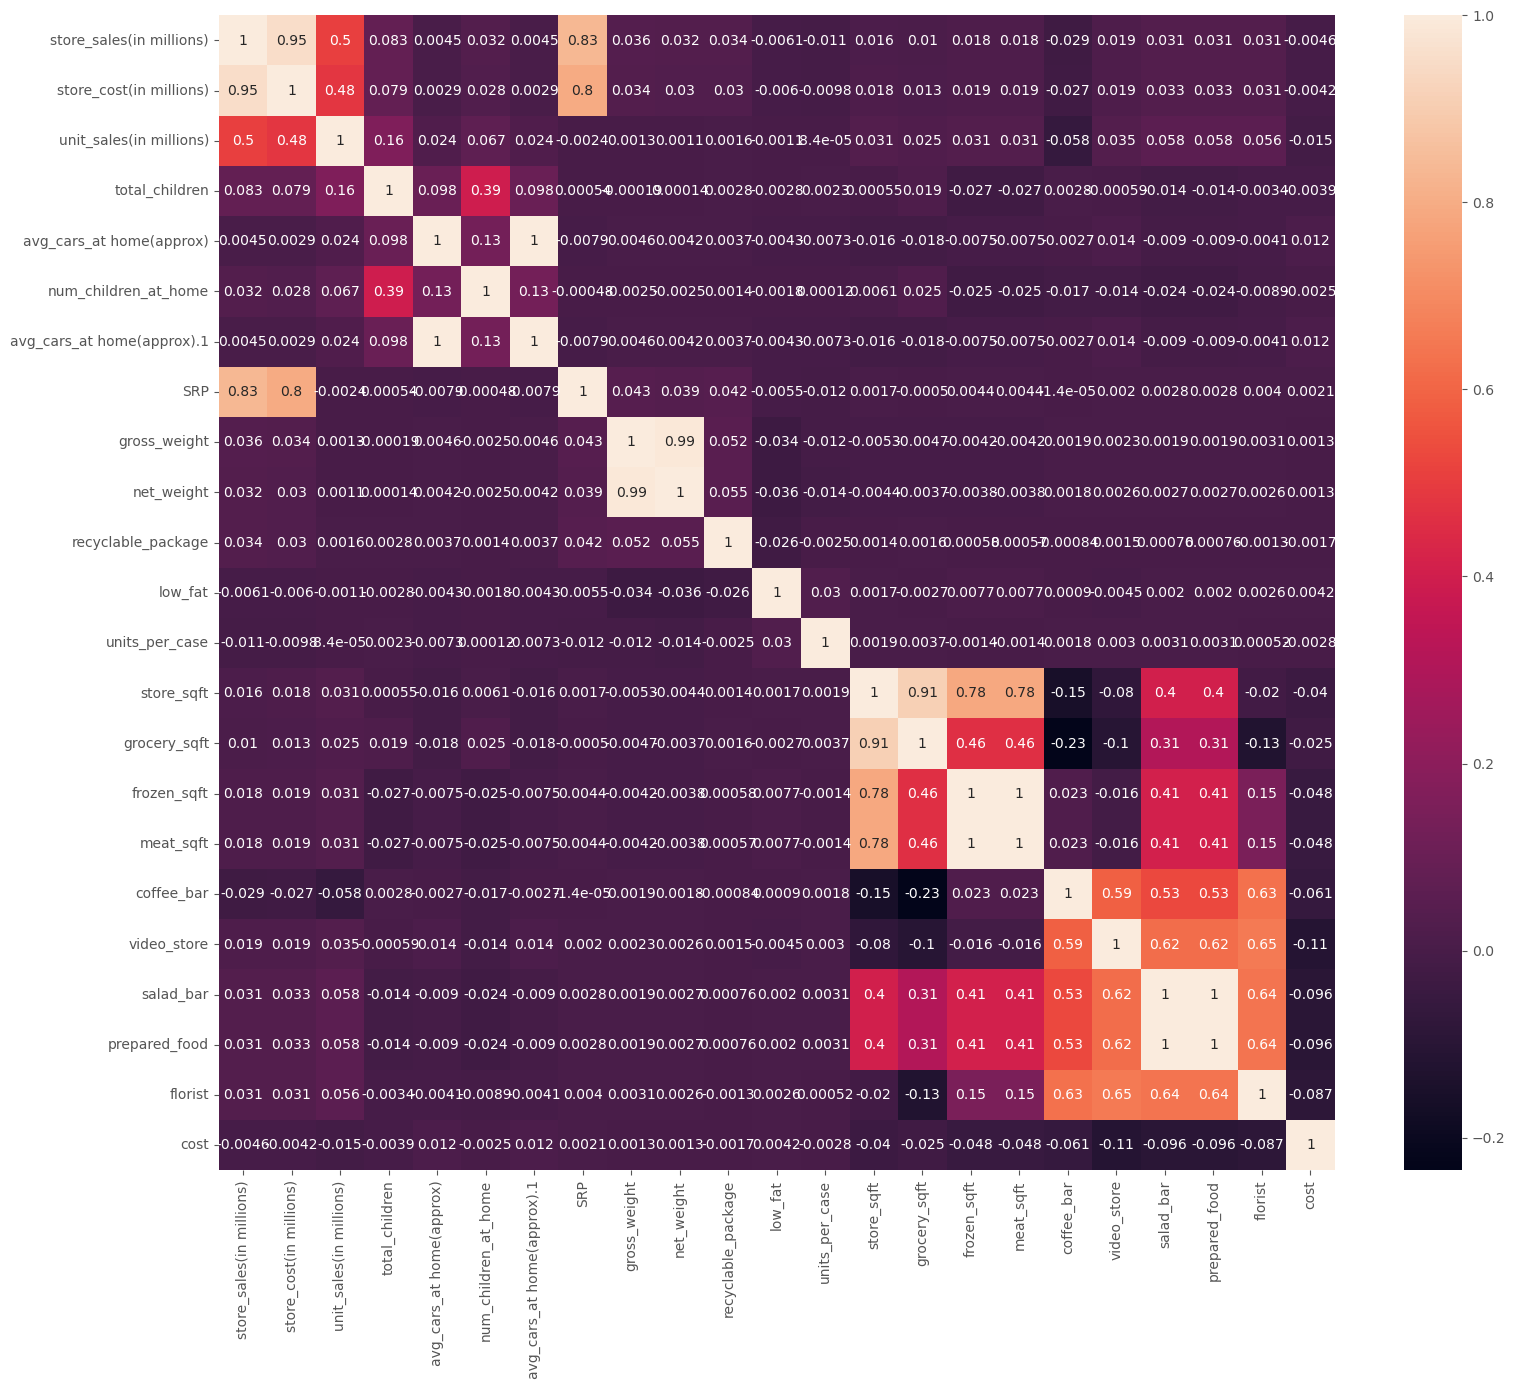

In [138]:
plt.figure(figsize=(18,15))
sns.heatmap(data=df.corr(), annot=True)

Elijo los umbrales con 0.8 y -0.8 para que las características mayores de 0.8 o menores de -0.8 se consideren como una fuerte correlación positiva y una fuerte correlación negativa, respectivamente.

* Como los gráficos muestran que la comida_preparada y la barra de ensaladas tienen una fuerte relación positiva (tienen 1 como punto de correlación), avg_cars_at_home (aprox.) con avg_cars_at home (aprox.). 1 para 1 seguido de net_weight y gross_weight con 0.99

meat_sqft y frozen_sqft tienen una fuerte correlación con 1

* store_sales y store_cost también tienen una alta correlación con 0,95 y comestibles_sqft con store_sqft para 0,91

* SRP tiene una alta correlación con store_sales y store_cost de 0,83 y 0,8 respectivamente

* En conclusión, elegí eliminar salad_bar, gross_weight, avg_cars_at home (approx).1, store_sales, store_cost, meat_sqft, store_sqft

In [139]:
df = df.drop(columns=['salad_bar', 'gross_weight', 'avg_cars_at home(approx).1', 'meat_sqft',
                          'store_sales(in millions)', 'store_cost(in millions)', 'store_sqft'])

In [140]:
df.shape

(60428, 33)

#### Datos numéricos

In [141]:
df_num=df[df.select_dtypes('float64').columns]
df_num.drop(columns='cost',inplace=True)
df_num.head()

,unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,SRP,net_weight,recyclable_package,low_fat,units_per_case,grocery_sqft,frozen_sqft,coffee_bar,video_store,prepared_food,florist
0,4.0,1.0,1.0,1.0,1.84,17.70,1.0,0.0,17.0,18670.0,5415.0,1.0,1.0,1.0,1.0
1,3.0,0.0,4.0,0.0,1.84,17.70,1.0,0.0,17.0,18670.0,5415.0,1.0,1.0,1.0,1.0
2,2.0,4.0,1.0,0.0,1.84,17.70,1.0,0.0,17.0,18670.0,5415.0,1.0,1.0,1.0,1.0
3,2.0,2.0,2.0,2.0,1.84,17.70,1.0,0.0,17.0,18670.0,5415.0,1.0,1.0,1.0,1.0
4,3.0,0.0,2.0,0.0,1.36,5.11,0.0,1.0,29.0,18670.0,5415.0,1.0,1.0,1.0,1.0


In [142]:
df_num.shape

(60428, 15)

In [143]:
df_num.describe()

,unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,SRP,net_weight,recyclable_package,low_fat,units_per_case,grocery_sqft,frozen_sqft,coffee_bar,video_store,prepared_food,florist
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,3.093169,2.533875,2.200271,0.829351,2.115258,11.796289,0.558665,0.350434,18.860694,19133.799696,5312.852552,0.612646,0.354157,0.587956,0.562603
std,0.827677,1.490165,1.109644,1.303424,0.932829,4.682986,0.496551,0.477110,10.258555,3987.395735,1575.907263,0.487150,0.478261,0.492207,0.496069
min,1.000000,0.000000,0.000000,0.000000,0.500000,3.050000,0.000000,0.000000,1.000000,13305.000000,2452.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,0.000000,1.410000,7.710000,0.000000,0.000000,10.000000,16232.000000,4746.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,2.000000,0.000000,2.130000,11.600000,1.000000,0.000000,19.000000,18670.000000,5062.000000,1.000000,0.000000,1.000000,1.000000
75%,4.000000,4.000000,3.000000,1.000000,2.790000,16.000000,1.000000,1.000000,28.000000,22123.000000,5751.000000,1.000000,1.000000,1.000000,1.000000
max,6.000000,5.000000,4.000000,5.000000,3.980000,20.800000,1.000000,1.000000,36.000000,30351.000000,9184.000000,1.000000,1.000000,1.000000,1.000000


In [144]:
#Escalar Variables

scaler = MinMaxScaler()
num_vars = df_num.columns.tolist()

df[num_vars] = scaler.fit_transform(df[num_vars])

df[num_vars].head()

,unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,SRP,net_weight,recyclable_package,low_fat,units_per_case,grocery_sqft,frozen_sqft,coffee_bar,video_store,prepared_food,florist
0,0.6,0.2,0.25,0.2,0.385057,0.825352,1.0,0.0,0.457143,0.314737,0.440137,1.0,1.0,1.0,1.0
1,0.4,0.0,1.00,0.0,0.385057,0.825352,1.0,0.0,0.457143,0.314737,0.440137,1.0,1.0,1.0,1.0
2,0.2,0.8,0.25,0.0,0.385057,0.825352,1.0,0.0,0.457143,0.314737,0.440137,1.0,1.0,1.0,1.0
3,0.2,0.4,0.50,0.4,0.385057,0.825352,1.0,0.0,0.457143,0.314737,0.440137,1.0,1.0,1.0,1.0
4,0.4,0.0,0.50,0.0,0.247126,0.116056,0.0,1.0,0.800000,0.314737,0.440137,1.0,1.0,1.0,1.0


In [145]:
df[df_num.columns.tolist()].describe()

,unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,SRP,net_weight,recyclable_package,low_fat,units_per_case,grocery_sqft,frozen_sqft,coffee_bar,video_store,prepared_food,florist
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,0.418634,0.506775,0.550068,0.165870,0.464155,0.492749,0.558665,0.350434,0.510306,0.341945,0.424963,0.612646,0.354157,0.587956,0.562603
std,0.165535,0.298033,0.277411,0.260685,0.268054,0.263830,0.496551,0.477110,0.293102,0.233920,0.234092,0.487150,0.478261,0.492207,0.496069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.250000,0.000000,0.261494,0.262535,0.000000,0.000000,0.257143,0.171712,0.340761,0.000000,0.000000,0.000000,0.000000
50%,0.400000,0.600000,0.500000,0.000000,0.468391,0.481690,1.000000,0.000000,0.514286,0.314737,0.387701,1.000000,0.000000,1.000000,1.000000
75%,0.600000,0.800000,0.750000,0.200000,0.658046,0.729577,1.000000,1.000000,0.771429,0.517306,0.490048,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Datos Categóricos

In [146]:
df_cat=df[df.select_dtypes('object').columns]
df_cat.columns

Index(['food_category', 'food_department', 'food_family', 'promotion_name',
       'sales_country', 'marital_status', 'gender', 'education', 'member_card',
       'occupation', 'houseowner', 'avg. yearly_income', 'brand_name',
       'store_type', 'store_city', 'store_state', 'media_type'],
      dtype='object')

In [147]:
df_cat.shape

(60428, 17)

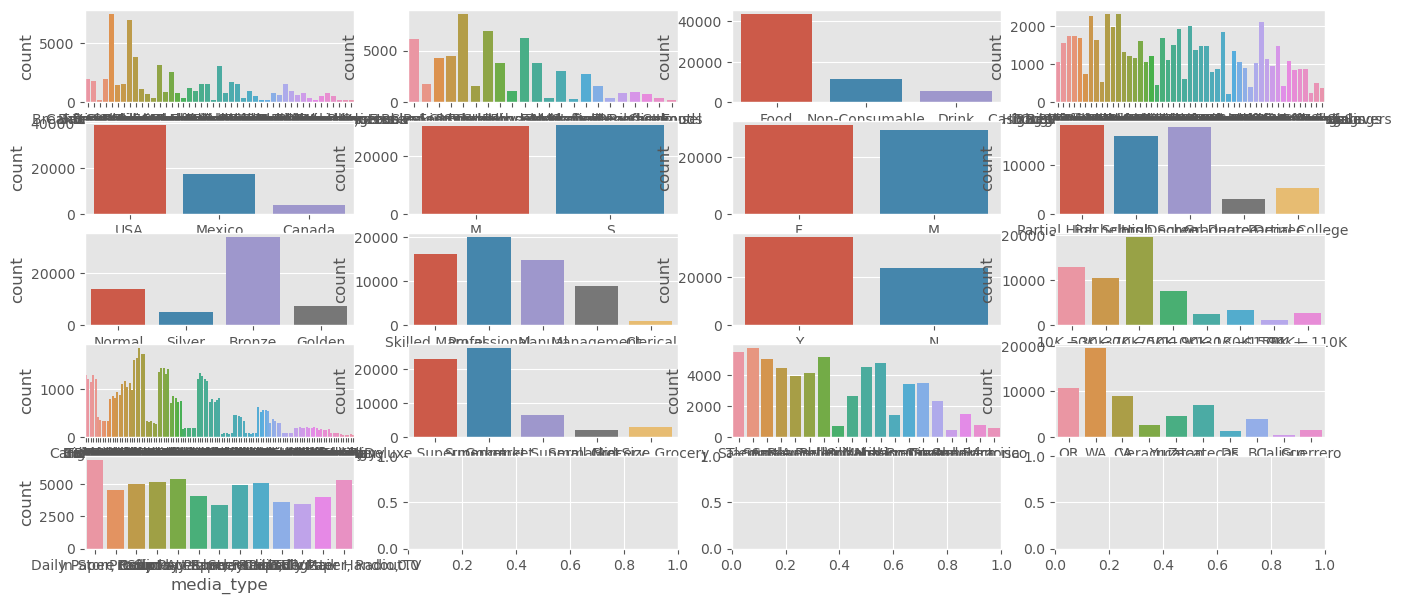

In [148]:
plot_multiples_graficas(df,df_cat.columns, 4, 5, 'c', None, (16,7))

In [149]:
df_cat.nunique()

food_category          45
food_department        22
food_family             3
promotion_name         49
sales_country           3
marital_status          2
gender                  2
education               5
member_card             4
occupation              5
houseowner              2
avg. yearly_income      8
brand_name            111
store_type              5
store_city             19
store_state            10
media_type             13
dtype: int64

In [150]:
df_reducida = df.drop(columns=['food_category', 'food_department','promotion_name','brand_name','store_city' ])


In [151]:
df_reducida.shape

(60428, 28)

## 3.6 Creación de Variables Dummies para categoricas

In [152]:
df_dummies =pd.get_dummies(df_reducida, drop_first=1)
df_dummies.shape

(60428, 66)

In [153]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60428 entries, 0 to 60427
Data columns (total 66 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   unit_sales(in millions)             60428 non-null  float64
 1   total_children                      60428 non-null  float64
 2   avg_cars_at home(approx)            60428 non-null  float64
 3   num_children_at_home                60428 non-null  float64
 4   SRP                                 60428 non-null  float64
 5   net_weight                          60428 non-null  float64
 6   recyclable_package                  60428 non-null  float64
 7   low_fat                             60428 non-null  float64
 8   units_per_case                      60428 non-null  float64
 9   grocery_sqft                        60428 non-null  float64
 10  frozen_sqft                         60428 non-null  float64
 11  coffee_bar                          60428

## 3.7 Dividir el conjunto de datos

In [154]:
# División de los datos en train y test
# ==============================================================================
x_cols = list(df_dummies.columns)
x_cols.remove('cost')
X = df_dummies[x_cols]
y = df_dummies['cost']

In [155]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

## 3.8 Creación del modelo

In [156]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     108.4
Date:                Fri, 06 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:32:55   Log-Likelihood:            -2.2989e+05
No. Observations:               48342   AIC:                         4.599e+05
Df Residuals:                   48278   BIC:                         4.605e+05
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [157]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

#4. Resultados


## 4.1 Evaluación del modelo

In [158]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)

mse = mean_squared_error (y_true  = y_test, y_pred  = predicciones, squared = True)
rmse = mean_squared_error (y_true  = y_test, y_pred  = predicciones, squared = False)
MAE = mean_absolute_error (y_true  = y_test, y_pred  = predicciones)
MedAE = median_absolute_error (y_true  = y_test, y_pred  = predicciones)
r2 = r2_score (y_true  = y_test, y_pred  = predicciones)

print(f"El error MSE   de test es: {mse}")
print(f"El error RMSE  de test es: {rmse}")
print(f"El error MAE   de test es: {MAE}")
print(f"El error MedAE de test es: {MedAE}")
print(f"El R2    de test es: {r2}")

El error MSE   de test es: 775.5528714354799
El error RMSE  de test es: 27.84874990794883
El error MAE   de test es: 23.3604906847983
El error MedAE de test es: 20.892029860247604
El R2    de test es: 0.13059051935884014


In [159]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(X_train)
residuos_train   = prediccion_train - y_train

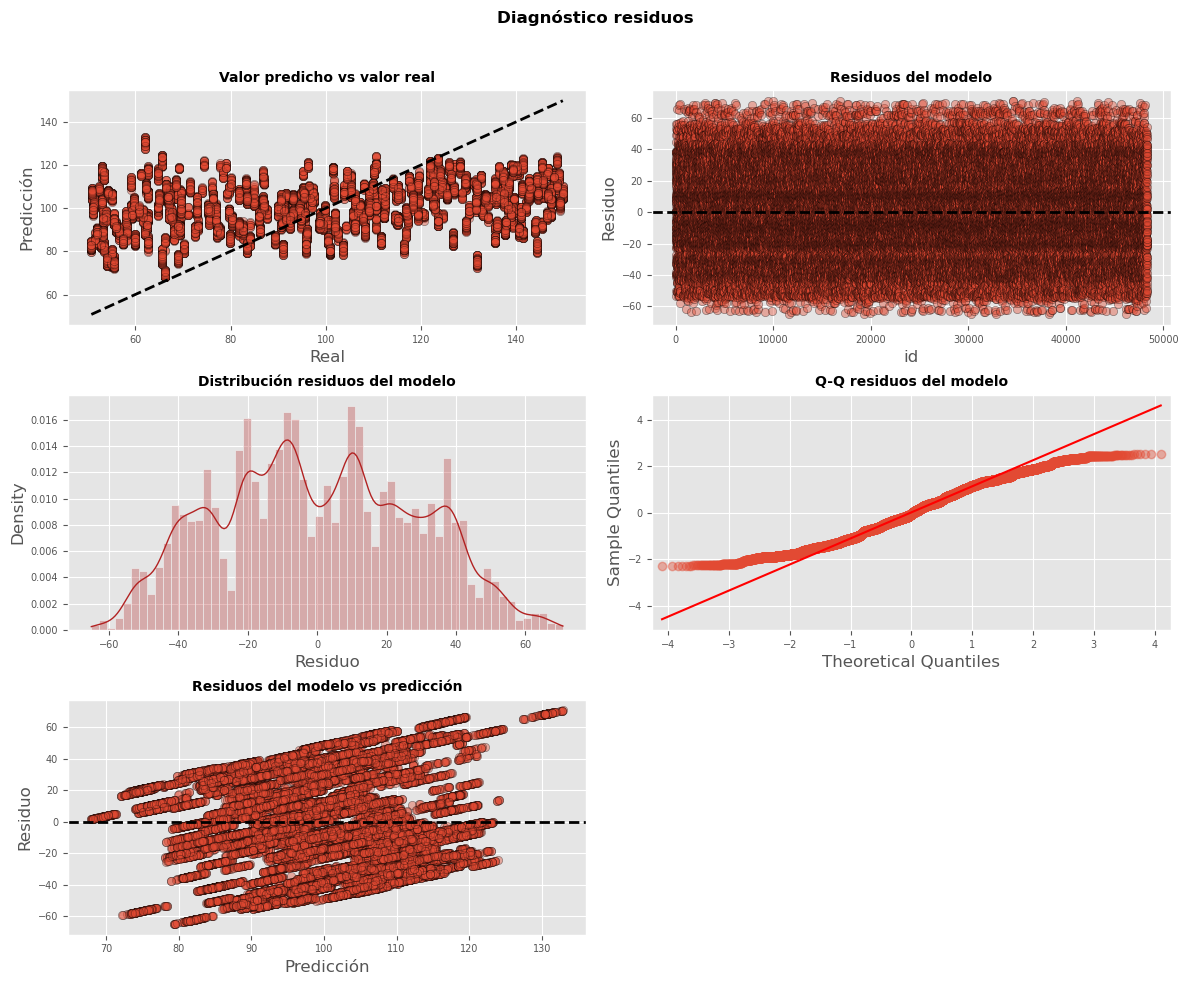

In [160]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)


axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

#### 4.1.1 Evaluar algunas instancias (o ejemplos)

ya que con regresion linear simple hay una exactitud del 12% , se intentaran otros metodos

In [161]:
# Creación del modelo
# ==============================================================================
modelo = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'mse',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,   #out-of-bag samples
            n_jobs       = -1,
            random_state = 123
         )


# Entrenamiento del modelo
# ==============================================================================
modelo.fit(X_train, y_train)

RandomForestRegressor(criterion='mse', n_estimators=10, n_jobs=-1,
                      random_state=123)

In [162]:
# Error de test del modelo inicial
# ==============================================================================
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(y_true  = y_test, y_pred  = predicciones, squared = False)
print(f"El error (rmse) de test es: {rmse}")

r2 = r2_score(y_test, predicciones)
print(f"El error (r2) de test es: {r2}")

El error (rmse) de test es: 17.140094412228866
El error (r2) de test es: 0.6706638674481038


In [163]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [20],
                 'max_features': [ 20,40,66],
                 'max_depth'   : [None, 22,25,35]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_r2': []}

for params in param_grid:
    
    modelo = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    
    resultados['params'].append(params)
    resultados['oob_r2'].append(modelo.oob_score_)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

,oob_r2,max_depth,max_features,n_estimators
8,0.661015,25.0,66.0,20.0
7,0.660157,25.0,40.0,20.0
2,0.659239,NaN,66.0,20.0
11,0.659117,35.0,66.0,20.0


In [164]:
df_reducida_2 = df.drop(columns=['food_category', 'food_department','brand_name'])
df_dummies_2 =pd.get_dummies(df_reducida_2, drop_first=1)
x_cols_2 = list(df_dummies_2.columns)
x_cols_2.remove('cost')
X_2 = df_dummies_2[x_cols_2]
y_2 = df_dummies_2['cost']

In [165]:
df_dummies_2.shape

(60428, 132)

In [166]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
                                        X_2,
                                        y_2.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [167]:
# Creación del modelo
# ==============================================================================
modelo_2 = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'mse',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,   #out-of-bag samples
            n_jobs       = -1,
            random_state = 123
         )


# Entrenamiento del modelo
# ==============================================================================
modelo_2.fit(X_train_2, y_train_2)

RandomForestRegressor(criterion='mse', n_estimators=10, n_jobs=-1,
                      random_state=123)

In [168]:
# Error de test del modelo inicial
# ==============================================================================
predicciones = modelo_2.predict(X = X_test_2)

rmse = mean_squared_error(y_true  = y_test_2, y_pred  = predicciones, squared = False)
print(f"El error (rmse) de test es: {rmse}")

r2 = r2_score(y_test, predicciones)
print(f"El error (r2) de test es: {r2}")

El error (rmse) de test es: 0.8170484880077503
El error (r2) de test es: 0.9992516433488422


In [169]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [20],
                 'max_features': [ 20,50, 90,130],
                 'max_depth'   : [None, 10,20,30,]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_r2': []}

for params in param_grid:
    
    modelo = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train_2, y_train_2)
    
    resultados['params'].append(params)
    resultados['oob_r2'].append(modelo.oob_score_)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

,oob_r2,max_depth,max_features,n_estimators
3,0.998976,NaN,130.0,20.0
2,0.998776,NaN,90.0,20.0
1,0.998741,NaN,50.0,20.0
0,0.993381,NaN,20.0,20.0


In [170]:
importancia_predictores = pd.DataFrame(
                            {'predictor': df_dummies_2.drop(columns = "cost").columns,
                             'importancia': modelo_2.feature_importances_*100}
                            )

In [171]:
for i in df_reducida_2.columns.tolist():
  for idx,row in importancia_predictores.iterrows():
    if i in row['predictor']:
      importancia_predictores.loc[idx,'variable']=i
importancia_variables=importancia_predictores.groupby('variable')['importancia'].sum().reset_index().sort_values('importancia',ascending=False).sort_values('importancia',ascending=False)

<AxesSubplot:xlabel='variable'>

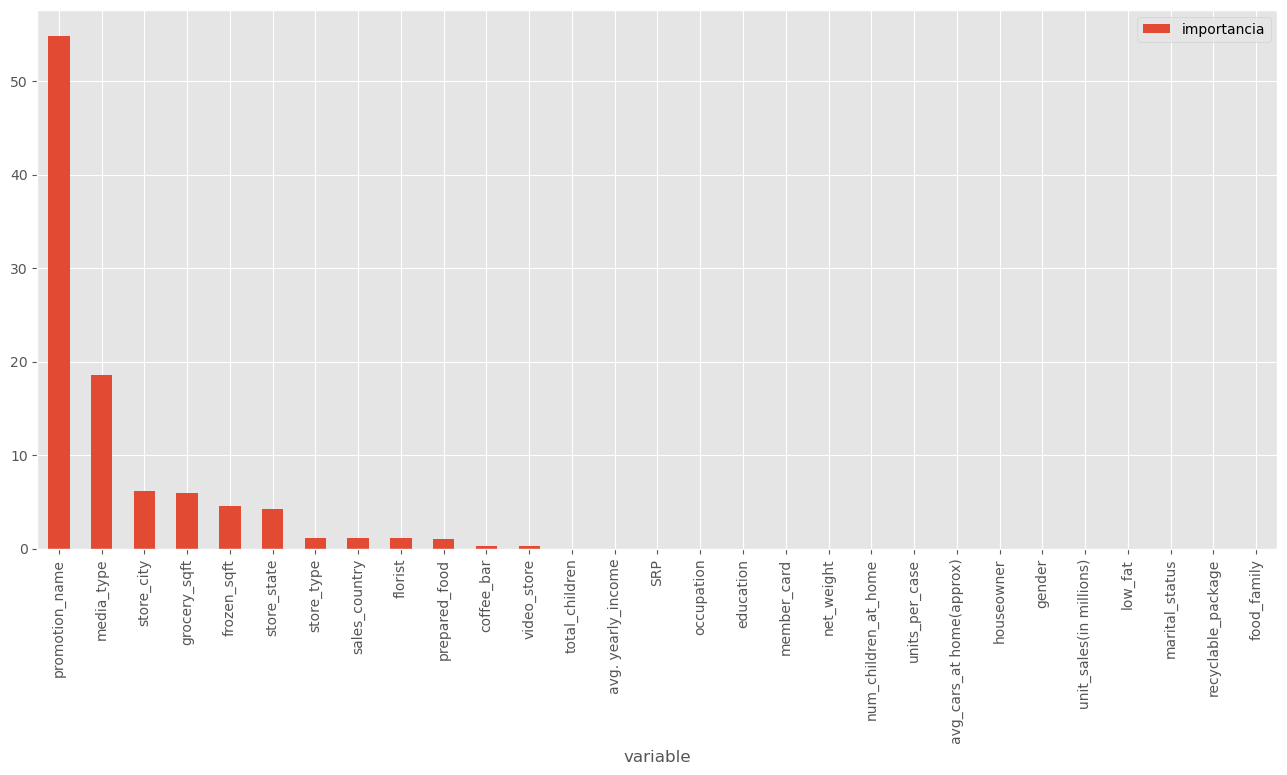

In [172]:
importancia_variables.plot(kind='bar',x='variable',y='importancia')

In [173]:
import pickle 
with open('trained_model-001.pkl', 'wb') as file:
    pickle.dump(modelo, file)

In [174]:

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

#Conclusiones

no se encontraron valores nulos ni valores duplicados dentro del dataset , no se pueden eliminar las variables categoricas solo por que sean grandes, se debe hacer un cluster  ya que al agregar la columna promotion name se sube substancialmente la eficiencia del modelo

In [175]:
df_reducida.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60428 entries, 0 to 60427
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   food_family               60428 non-null  object 
 1   unit_sales(in millions)   60428 non-null  float64
 2   sales_country             60428 non-null  object 
 3   marital_status            60428 non-null  object 
 4   gender                    60428 non-null  object 
 5   total_children            60428 non-null  float64
 6   education                 60428 non-null  object 
 7   member_card               60428 non-null  object 
 8   occupation                60428 non-null  object 
 9   houseowner                60428 non-null  object 
 10  avg_cars_at home(approx)  60428 non-null  float64
 11  avg. yearly_income        60428 non-null  object 
 12  num_children_at_home      60428 non-null  float64
 13  SRP                       60428 non-null  float64
 14  net_we

In [176]:
listi=X_2.columns.to_list()
with open('orden_entrada_modelo.txt', 'w') as f:
    f.write('\n'.join(listi))